In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 250 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'bad': 0, 'good': 1}

In [4]:

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 7,
         epochs = 10,
         validation_data = test_dataset
       
         )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 18s 3s/step - loss: 0.7229 - accuracy: 0.5459 - val_loss: 0.6762 - val_accuracy: 0.6364
Epoch 2/10
7/7 [==============================] - 13s 2s/step - loss: 0.5765 - accuracy: 0.7339 - val_loss: 0.6351 - val_accuracy: 0.7273
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 0.4580 - accuracy: 0.7844 - val_loss: 0.6017 - val_accuracy: 0.7403
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.3854 - accuracy: 0.8486 - val_loss: 0.6240 - val_accuracy: 0.7403
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.3388 - accuracy: 0.8807 - val_loss: 0.6791 - val_accuracy: 0.7792
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.3716 - accuracy: 0.8532 - val_loss: 0.6077 - val_accuracy: 0.8182
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.3060 - accuracy: 0.8899 

In [7]:
def rateMyPint(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("GOOD",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("BAD",fontsize=30)

[[1.]]


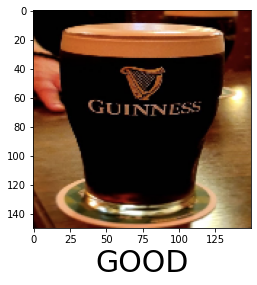

In [8]:
rateMyPint("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/good/good.127.png")

[[0.]]


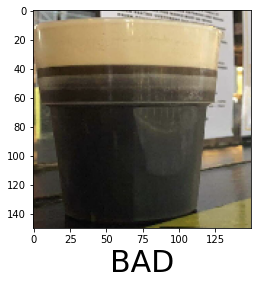

In [9]:
rateMyPint("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/bad/bad.128.png")

In [10]:
rateMyPint("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/good/good.159.png")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/good/good.159.png'

[[0.]]


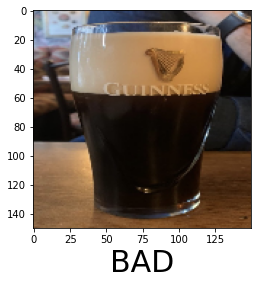

In [11]:
rateMyPint("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/bad/bad.159.png")

[[1.]]


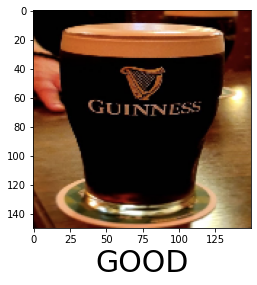

In [12]:
rateMyPint("/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/data/Test/good/good.127.png")

[[0.]]


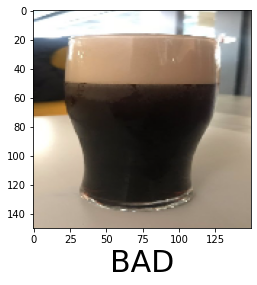

In [13]:
rateMyPint("/Users/conorshirren/Desktop/a.png")

[[1.]]


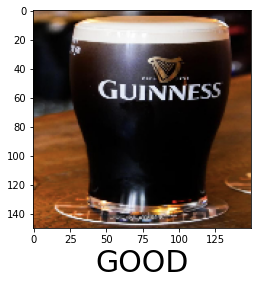

In [14]:
rateMyPint("/Users/conorshirren/Desktop/b.png")

In [15]:
filenames = test_dataset.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_dataset,steps = nb_samples)

Instructions for updating:
Please use Model.predict, which supports generators.


[[0.]]


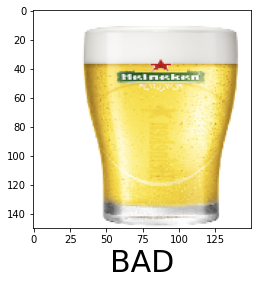

In [16]:
rateMyPint("/Users/conorshirren/Desktop/c.png")

[[0.]]


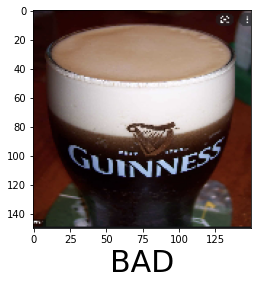

In [17]:
rateMyPint("/Users/conorshirren/Desktop/d.png")

[[1.]]


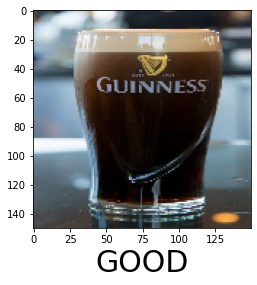

In [18]:
rateMyPint("/Users/conorshirren/Desktop/e.png")

[[0.]]


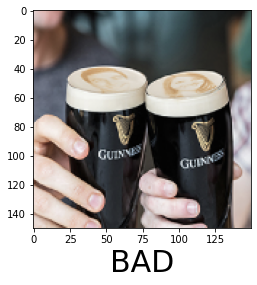

In [19]:
rateMyPint("/Users/conorshirren/Desktop/f.png")

In [20]:
model.save("model.h5")

In [21]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 4.5 MB/s eta 0:00:011
     |████████████████████████████████| 108 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 198.9 MB 45 kB/s s eta 0:00:01    |██                              | 11.8 MB 16.4 MB/s eta 0:00:12     |██▏                             | 13.2 MB 16.4 MB/s eta 0:00:12     |██▍                             | 15.1 MB 16.4 MB/s eta 0:00:12     |███▎                            | 20.2 MB 12.8 MB/s eta 0:00:14     |████▋                           | 28.5 MB 13.6 MB/s eta 0:00:13     |█████                           | 31.5 MB 13.6 MB/s eta 0:00:13     |██████▏                         | 38.4 MB 3.2 MB/s eta 0:00:50     |███████▏                        | 44.8 MB 7.0 MB/s eta 0:00:23     |███████▍                        | 46.1 MB 7.0 MB/s eta 0:00:22     |█████████▉                      | 61.2 MB 2.6 MB/s eta 0:00:53     |██████████▌                     | 65.2 MB 2.6 MB/s eta 0:00:52     |██████████▋                     | 

     |████████████████████████████████| 146 kB 48.3 MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=5f83e8c88c47b688c6c4569f91a4c973527466b0b620ab064a15b9d475e2e4c5
  Stored in directory: /Users/conorshirren/Library/Caches/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.36.1
    Uninstalling grpcio-1.36.1:
      Successfully uni

In [22]:
! tensorflowjs_converter --input_format=keras "model.h5" "./"

Traceback (most recent call last):
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", l

In [23]:
! tensorflowjs_converter --input_format=keras "./model.h5" "./"

Traceback (most recent call last):
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/Users/conorshirren/opt/miniconda3/envs/Pints/lib/python3.7/site-packages/tensorflowjs/converters/converter.py", l

In [24]:
! tensorflowjs_converter --input_format=keras "/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai/model.h5" "/Users/conorshirren/Documents/SoftwareDev/MachineLearning/pints_ai" 